In [3]:
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np
import pandas as pd
import pathlib

import ambulance_game as abg
from main import (
    get_index_of_values,
    get_matrices,
    get_poa_values_for_given_strategies,
    run_replicator_dynamics_with_penalty,
    plot_asymmetric_replicator_dynamics_with_penalty,
    run_replicator_dynamics_with_dual_parameters,
    get_poa_values_for_given_strategies_dual_parameters,
    plot_asymmetric_replicator_dynamics_with_dual_parameters
)

In [4]:
problem_parameters_0 = {
    "lambda_2": 10.7,
    "lambda_1_1": 4.5,
    "lambda_1_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 6,
    "system_capacity_2": 7,
    "buffer_capacity_1": 5,
    "buffer_capacity_2": 4,
    "target": 2,
    "alpha": 0.9,
}

## Getting the matrices

In [5]:
A_0, B_0, R_0 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_0["lambda_2"],
    lambda_1_1=problem_parameters_0["lambda_1_1"],
    lambda_1_2=problem_parameters_0["lambda_1_2"],
    mu_1=problem_parameters_0["mu_1"],
    mu_2=problem_parameters_0["mu_2"],
    num_of_servers_1=problem_parameters_0["num_of_servers_1"],
    num_of_servers_2=problem_parameters_0["num_of_servers_2"],
    system_capacity_1=problem_parameters_0["system_capacity_1"],
    system_capacity_2=problem_parameters_0["system_capacity_2"],
    buffer_capacity_1=problem_parameters_0["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_0["buffer_capacity_2"],
    target=problem_parameters_0["target"],
    alpha=problem_parameters_0["alpha"],
)
A_0 += 1
B_0 += 1

# Asymmetric replicator dynamics behaviour

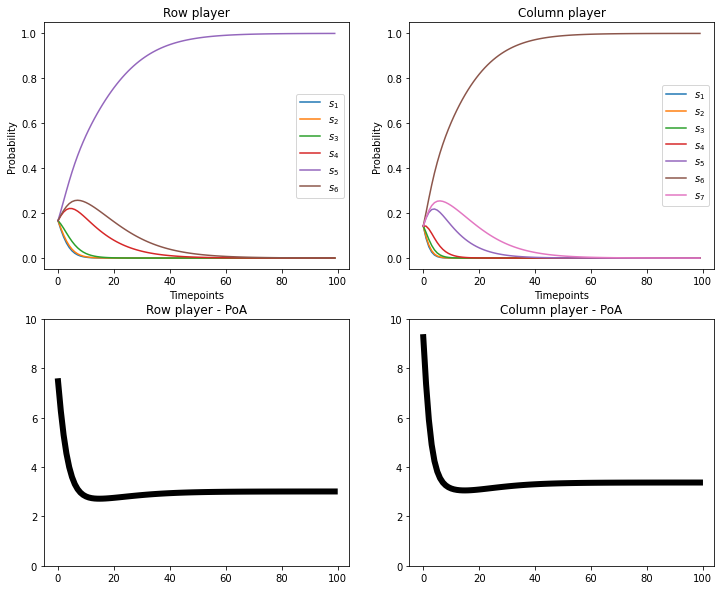

In [6]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R_0, 
    A=A_0, 
    B=B_0, 
    problem_parameters=problem_parameters_0,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=None, 
    poa_plot_min=0, 
    poa_plot_max=10,
)


## Flooding the system (increasing $\lambda_2$)

In [14]:
problem_parameters_1 = problem_parameters.copy()
problem_parameters_1["lambda_2"] = 24

In [15]:
A_1, B_1, R_1 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_1["lambda_2"],
    lambda_1_1=problem_parameters_1["lambda_1_1"],
    lambda_1_2=problem_parameters_1["lambda_1_2"],
    mu_1=problem_parameters_1["mu_1"],
    mu_2=problem_parameters_1["mu_2"],
    num_of_servers_1=problem_parameters_1["num_of_servers_1"],
    num_of_servers_2=problem_parameters_1["num_of_servers_2"],
    system_capacity_1=problem_parameters_1["system_capacity_1"],
    system_capacity_2=problem_parameters_1["system_capacity_2"],
    buffer_capacity_1=problem_parameters_1["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_1["buffer_capacity_2"],
    target=problem_parameters_1["target"],
    alpha=problem_parameters_1["alpha"],
)
A_1 += 1
B_1 += 1

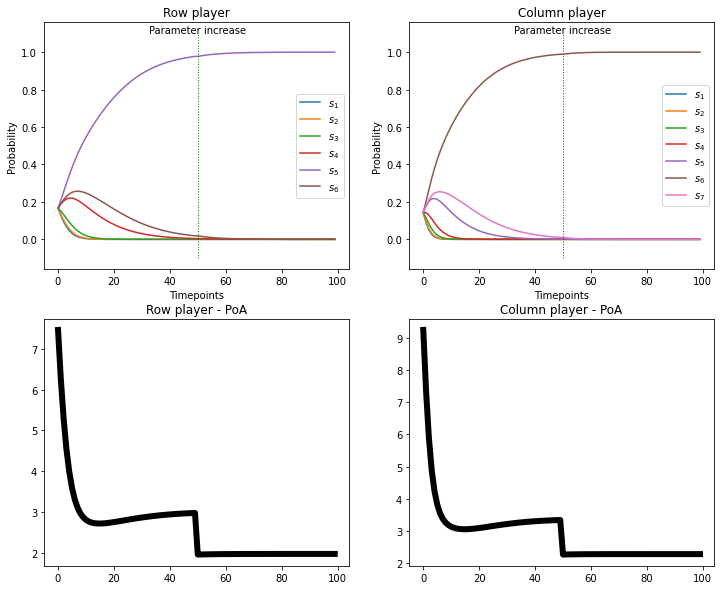

In [17]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R_0,
    A1=A_0,
    B1=B_0,
    R2=R_1,
    A2=A_1,
    B2=B_1,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters_0,
    problem_parameters_2=problem_parameters_1,
    x_init=None,
    y_init=None,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

## Adding resources (increasing $C_A$ and $C_B$)

In [29]:
problem_parameters_2 = problem_parameters.copy()
problem_parameters_2["num_of_servers_1"] = 4
problem_parameters_2["num_of_servers_2"] = 3

In [30]:
A_2, B_2, R_2 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_2["lambda_2"],
    lambda_1_1=problem_parameters_2["lambda_1_1"],
    lambda_1_2=problem_parameters_2["lambda_1_2"],
    mu_1=problem_parameters_2["mu_1"],
    mu_2=problem_parameters_2["mu_2"],
    num_of_servers_1=problem_parameters_2["num_of_servers_1"],
    num_of_servers_2=problem_parameters_2["num_of_servers_2"],
    system_capacity_1=problem_parameters_2["system_capacity_1"],
    system_capacity_2=problem_parameters_2["system_capacity_2"],
    buffer_capacity_1=problem_parameters_2["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_2["buffer_capacity_2"],
    target=problem_parameters_2["target"],
    alpha=problem_parameters_2["alpha"],
)
A_2 += 1
B_2 += 1

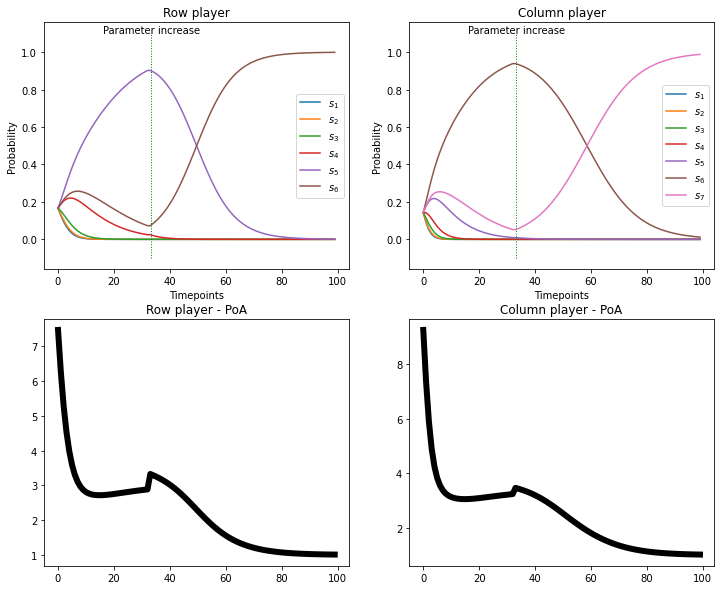

In [40]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R_0,
    A1=A_0,
    B1=B_0,
    R2=R_2,
    A2=A_2,
    B2=B_2,
    timepoints=np.linspace(1, 100000, 100),
    divide=3,
    problem_parameters_1=problem_parameters_0,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)

## Penalise strategies

$$
    A = 
    \begin{pmatrix}
        x & x & x & x \\
        x & x & x & x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    B = 
    \begin{pmatrix}
        y & y & y & y \\
        y & y & y & y \\
        y & y & y & y \\    
    \end{pmatrix}
$$

$$
    \tilde{A} = 
    \begin{pmatrix}
        x & x & x & x \\
        \rho x & \rho x & \rho x & \rho x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    \tilde{B} = 
    \begin{pmatrix}
        y & \rho y & y & y \\
        y & \rho y & y & y \\
        y & \rho y & y & y \\    
    \end{pmatrix}
$$

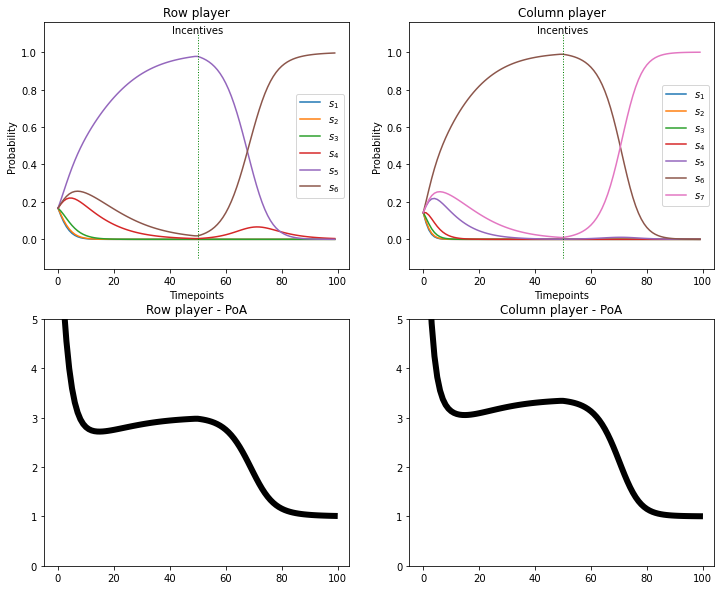

In [41]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R_0,
    A=A_0,
    B=B_0,
    problem_parameters=problem_parameters_0,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=0.9997,
    poa_plot_min=0, 
    poa_plot_max=5,
)

# Scaling matrices

In [14]:
(A_0 + 0.9997) * 1000

array([[1997.23673691, 1997.23673691, 1997.23673691, 1997.23673691,
        1997.23673691, 1997.23673691, 1997.23673691],
       [1997.23824345, 1997.23817496, 1997.23815688, 1997.23813407,
        1997.23809776, 1997.23801953, 1997.23775194],
       [1997.24309059, 1997.24270367, 1997.24257772, 1997.24242799,
        1997.24221271, 1997.24181118, 1997.24070633],
       [1997.25826116, 1997.25648128, 1997.25588551, 1997.25518821,
        1997.25422003, 1997.25251561, 1997.24838667],
       [1997.27636577, 1997.27283689, 1997.27153201, 1997.27002204,
        1997.26798273, 1997.26458143, 1997.25704934],
       [1997.29096058, 1997.28649   , 1997.28440456, 1997.28207755,
        1997.27913592, 1997.2746695 , 1997.26576625]])

In [15]:
matrices_scale = 10000

In [19]:
new_A = A_0 * matrices_scale - np.min((A_0, B_0)) * matrices_scale
new_B = B_0 * matrices_scale - np.min((A_0, B_0)) * matrices_scale

In [20]:
new_A

array([[0.2165202 , 0.2165202 , 0.2165202 , 0.2165202 , 0.2165202 ,
        0.2165202 , 0.2165202 ],
       [0.23158555, 0.23090064, 0.23071984, 0.23049182, 0.23012872,
        0.22934636, 0.22667049],
       [0.28005695, 0.27618777, 0.27492828, 0.273431  , 0.27127814,
        0.26726288, 0.25621443],
       [0.43176266, 0.41396389, 0.40800622, 0.40103319, 0.39135134,
        0.37430717, 0.33301783],
       [0.61280881, 0.57751995, 0.56447116, 0.54937151, 0.52897841,
        0.49496538, 0.4196445 ],
       [0.75875692, 0.7140511 , 0.69319668, 0.6699266 , 0.64051026,
        0.59584608, 0.50681357]])